![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [79]:
# Start your code here!
import pandas as pd

In [80]:
women_df=pd.read_csv('women_results.csv')
women_df
women_df['date']=pd.to_datetime(women_df['date'])
women_wc=women_df[(women_df['date']>='2002-01-01') & (women_df['tournament']=='FIFA World Cup')]
women_wc

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


In [81]:
men_df=pd.read_csv('men_results.csv')
men_df
men_df['date']=pd.to_datetime(men_df['date'])
men_wc=men_df[(men_df['date']>='2002-01-01') & (men_df['tournament']=='FIFA World Cup')]
men_wc

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


In [82]:
women_wc['total_g']=women_wc['home_score']+women_wc['away_score']
women_wc['total_g']=women_wc['total_g'].dropna()
w_goal=women_wc['total_g'].mean()
w_goal

2.98

In [83]:
men_wc['total_g']=men_wc['home_score']+men_wc['away_score']
men_wc['total_g']=men_wc['total_g'].dropna()
m_goal=men_wc['total_g'].mean()
m_goal

2.5130208333333335

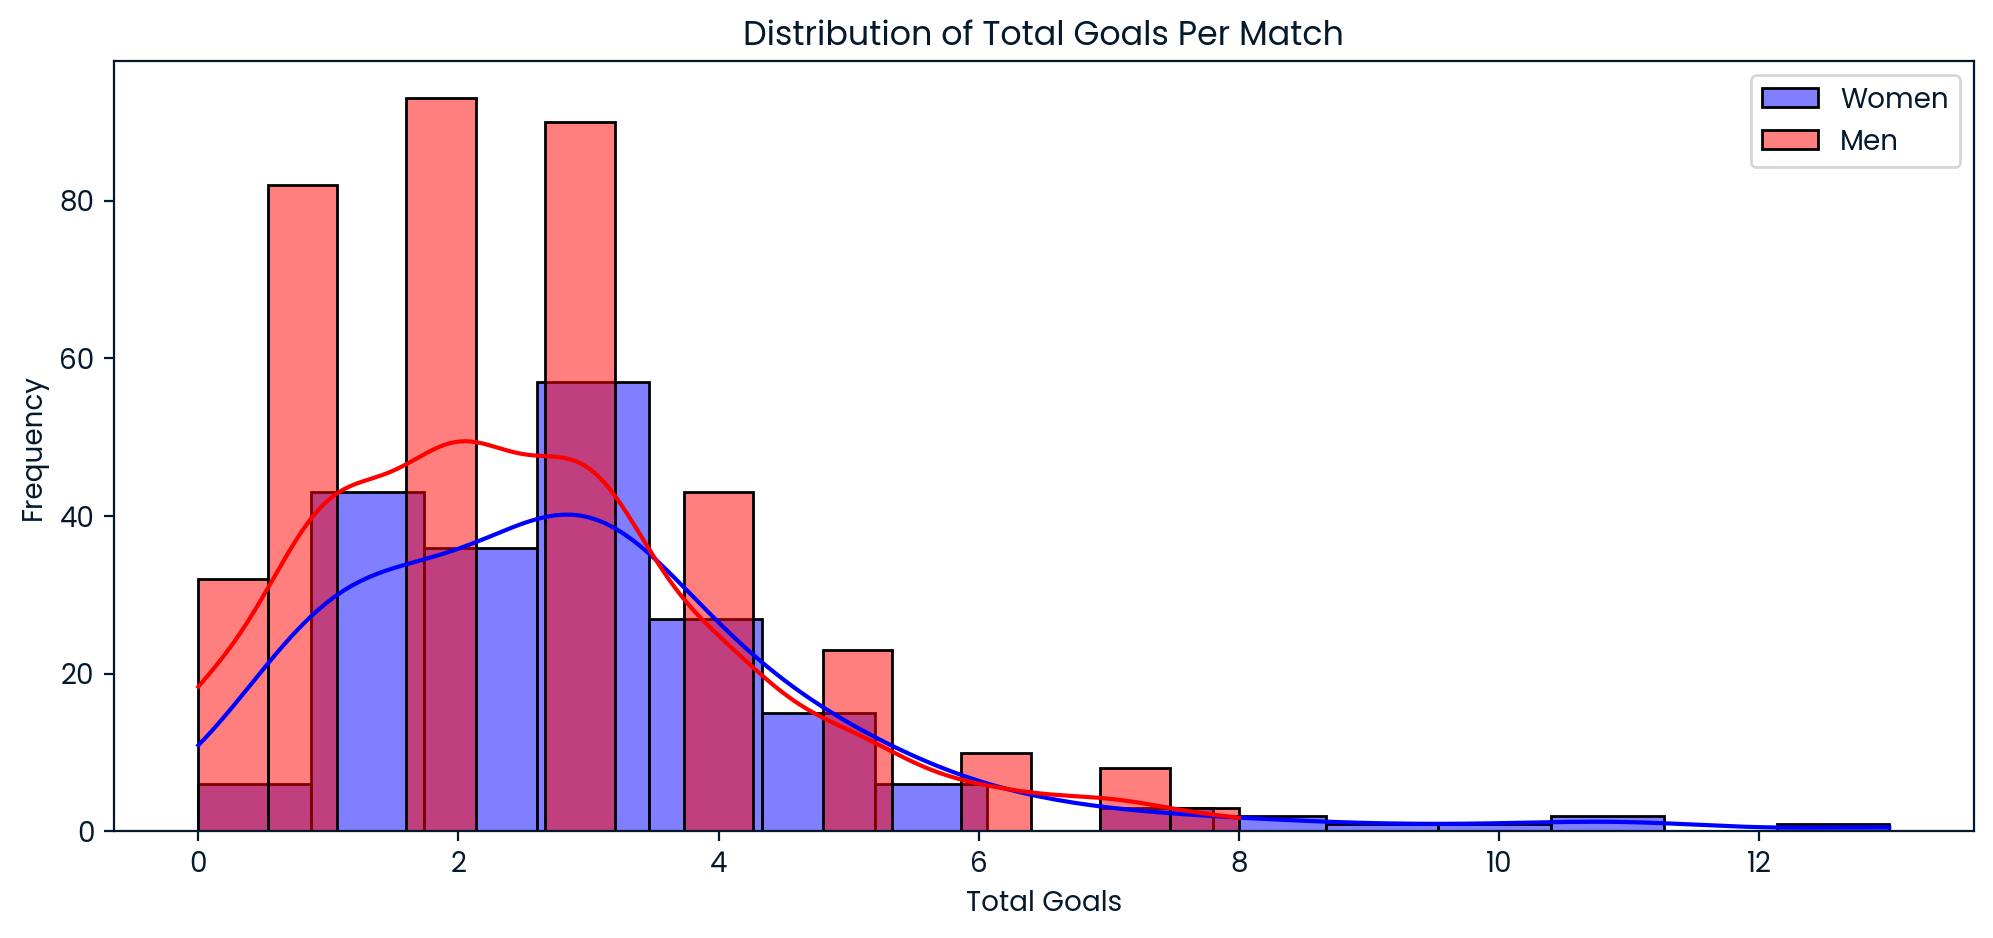

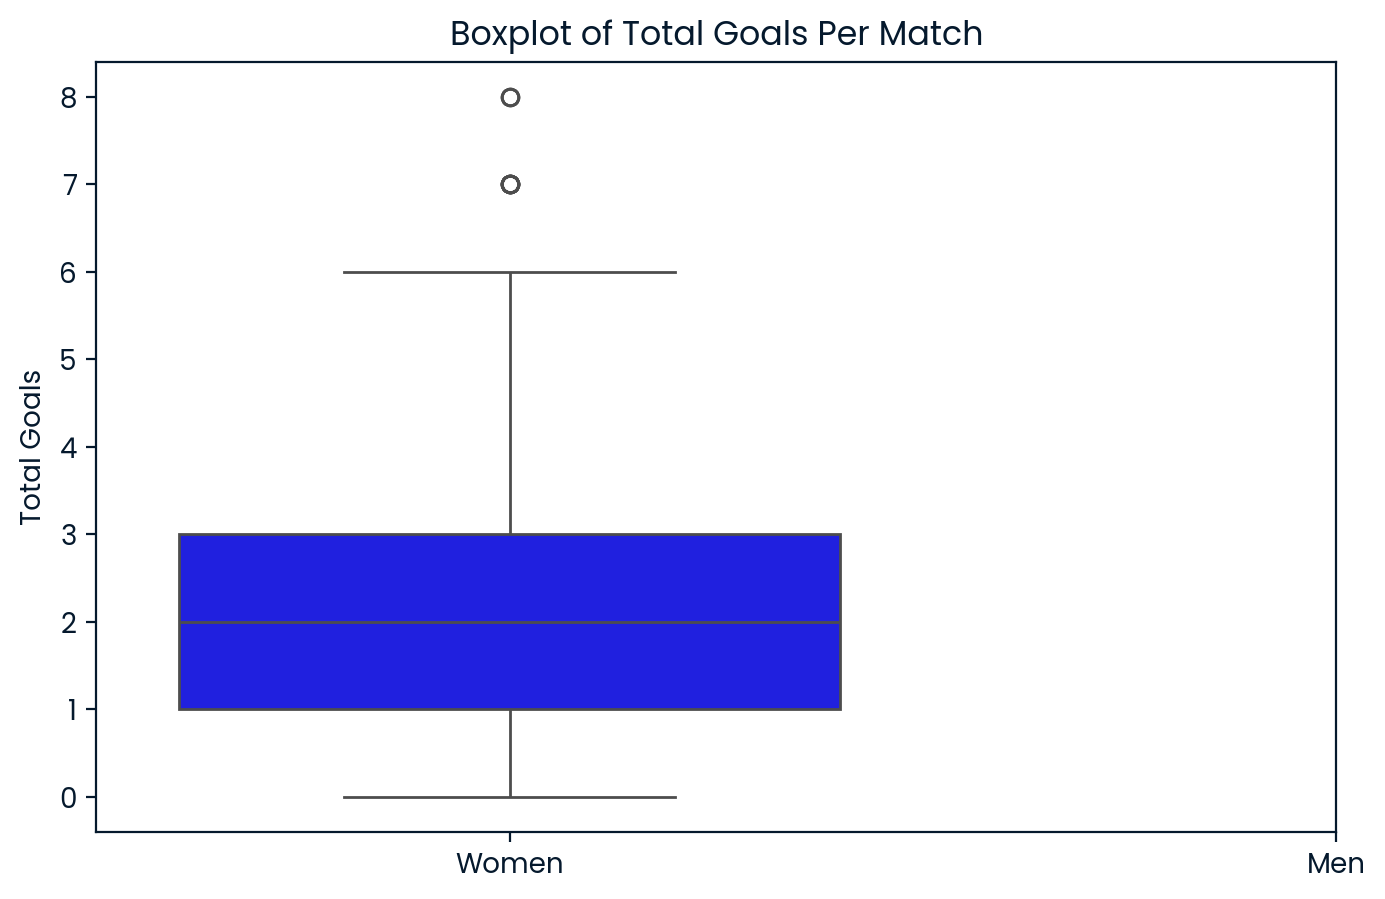

Shapiro-Wilk test for women: W=0.8491013050079346, p-value=3.8905201759850683e-13
Shapiro-Wilk test for men: W=0.9266489744186401, p-value=8.894154401688226e-13
At least one distribution is non-normal. Use Wilcoxon-Mann-Whitney test.


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ks_1samp
import numpy as np

# Plot histograms
plt.figure(figsize=(12, 5))
sns.histplot(women_wc['total_g'], bins=15, kde=True, color="blue", label="Women")
sns.histplot(men_wc['total_g'], bins=15, kde=True, color="red", label="Men")
plt.legend()
plt.title("Distribution of Total Goals Per Match")
plt.xlabel("Total Goals")
plt.ylabel("Frequency")
plt.show()

# Boxplots for visualizing distributions
plt.figure(figsize=(8, 5))
sns.boxplot(data=[women_wc['total_g'], men_wc['total_g']], palette=["blue", "red"])
plt.xticks([0, 1], ["Women", "Men"])
plt.title("Boxplot of Total Goals Per Match")
plt.ylabel("Total Goals")
plt.show()

# Normality Tests (Shapiro-Wilk for small samples, Kolmogorov-Smirnov for large)
if len(women_wc['total_g']) < 5000:
    stat_w, p_w = shapiro(women_wc['total_g'])
    print(f"Shapiro-Wilk test for women: W={stat_w}, p-value={p_w}")
else:
    p_w = ks_1samp(women_wc['total_g'], np.random.normal(np.mean(women_wc['total_g']), np.std(women_wc['total_g']), len(women_wc['total_g']))).pvalue
    print(f"Kolmogorov-Smirnov test for women: p-value={p_w}")

if len(men_wc['total_g']) < 5000:
    stat_m, p_m = shapiro(men_wc['total_g'])
    print(f"Shapiro-Wilk test for men: W={stat_m}, p-value={p_m}")
else:
    p_m = ks_1samp(men_wc['total_g'], np.random.normal(np.mean(men_wc['total_g']), np.std(men_wc['total_g']), len(men_wc['total_g']))).pvalue
    print(f"Kolmogorov-Smirnov test for men: p-value={p_m}")

# Interpretation
if p_w > 0.05 and p_m > 0.05:
    print("Both distributions are approximately normal. Use Welch’s t-test.")
else:
    print("At least one distribution is non-normal. Use Wilcoxon-Mann-Whitney test.")

In [85]:
from scipy.stats import mannwhitneyu

women_goals=women_wc['total_g']
men_goals=men_wc['total_g']

# Perform the Mann-Whitney U test
u_stat, p_val = mannwhitneyu(women_goals, men_goals, alternative="greater")

# Determine whether to reject the null hypothesis
alpha = 0.10  # 10% significance level
result = "reject" if p_val < alpha else "fail to reject"

# Store results in dictionary
result_dict = {"p_val": p_val, "result": result}

print(result_dict)


{'p_val': 0.005106609825443641, 'result': 'reject'}


In [86]:
# from scipy.stats import ttest_ind

# # Perform independent t-test (one-tailed)
# t_stat, p_val = ttest_ind(w_goal, m_goal, alternative="greater")

# # Store result in dictionary
# alpha = 0.10  # 10% significance level
# result = "reject" if p_val < alpha else "fail to reject"

# result_dict = {"p_val": p_val, "result": result}
# result
# # result_dict

In [87]:
# t_stat, p_val_two_tailed = ttest_ind(women_wc['total_g'], men_wc['total_g'], equal_var=False)  # Welch’s t-test (assumes unequal variances)

# # Convert to one-tailed p-value (since Ha is "greater than")
# p_val = p_val_two_tailed / 2 if t_stat > 0 else 1 - (p_val_two_tailed / 2)

# # Store result in dictionary
# alpha = 0.10  # 10% significance level
# result = "reject" if p_val < alpha else "fail to reject"

# result_dict = {"p_val": round(p_val, 6), "result": result}

# # Print result
# print(result_dict)
# result
# p_val

In [88]:
# t_stat, p_val = ttest_ind(women_wc['total_g'], men_wc['total_g'], equal_var=False, alternative="greater")

# # Store result in dictionary
# alpha = 0.10  # 10% significance level
# result = "reject" if p_val < alpha else "fail to reject"

# result_dict = {"p_val": round(p_val, 6), "result": result}

# # Print result
# print(result_dict)